# Assignment
To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks below, and plan on discussing with your mentor. You can also take a look at these example solutions.

1. Get the silhouette coefficient of the two cluster k-means solution. You'll notice that the silhouette coefficient will turn out to be greater than the one above where cluster number is three. We know that the Iris dataset consists of three different clusters. How do you explain that the silhouette score of the solution with the number of clusters being equal to the correct number of classes is lower than the one where the number of clusters is different from the correct number of classes?

2. In this assignment, you'll be working with the heart disease dataset from the UC Irvine Machine Learning Repository.

Load the dataset from the Thinkful's database. Here's the credentials you can use to connect to the database:

        postgres_user = 'dsbc_student'
        postgres_pw = '7*.8G9QH21'
        postgres_host = '142.93.121.174'
        postgres_port = '5432'
        postgres_db = 'heartdisease'
The dataset needs some preprocessing. So, apply the following code before working with the dataset:

Define the features and the outcome

        X = heartdisease_df.iloc[:, :13]
        y = heartdisease_df.iloc[:, 13]

Replace missing values (marked by ?) with a 0

        X = X.replace(to_replace='?', value=0)

Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis

        y = np.where(y > 0, 0, 1)
        
Here, X will be your features and in y we hold the labels. If y is equal to 1, then it indicates that the corresponding patient has heart disease and if y is equal to 0, then the patient doesn't have heart disease.

1. Split the data randomly into two and apply k-means using two, three and four as the number of clusters as we did in our discussion of the consistency in this checkpoint. Assess the consistency of the solutions using visualization. Which one does seem to be the best one?
2. Apply k-means on the whole dataset by setting k is equal two, three and four and get ARI score for each of them. Which model is the best?
3. Apply k-means on the whole dataset by setting k is equal two, three and four and get silhouette coefficient for each of them. Which model is the best?

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import datasets, metrics
from sqlalchemy import create_engine

# #1

In [73]:
# Loading the data from Sklearn's datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Computing the first principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Split the data into four equally-sized samples. First we break it in half:
X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(
    X_std,
    X_pca,
    test_size=0.5,
    random_state=13579)

In [74]:
# Data frame to store features and predicted cluster memberships.
ypred = pd.DataFrame()

# Pass a list of tuples and a counter that increments each time we go
# through the loop. The tuples are the data to be used by k-means,
# and the PCA-derived features for graphing. We use k-means to fit a
# model to the data, then store the predicted values and the two-feature
# PCA solution in the data frame.
for counter, data in enumerate([
    (X_half1, X_pcahalf1),
    (X_half2, X_pcahalf2)]):
    
    # Put the features into ypred.
    ypred['pca_f1' + '_sample' + str(counter)] = pd.Series(data[1][:,0])
    ypred['pca_f2' + '_sample' + str(counter)] = pd.Series(data[1][:,1])
    
    # Generate cluster predictions and store them for clusters 2 to 4.
    for nclust in range(2, 5):
        pred = KMeans(n_clusters=nclust, random_state=123).fit_predict(data[counter])
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pd.Series(pred)

In [77]:
ypred

,pca_f1_sample0,pca_f2_sample0,clust2_sample0,clust3_sample0,clust4_sample0,pca_f1_sample1,pca_f2_sample1,clust2_sample1,clust3_sample1,clust4_sample1
0,-2.262215,2.686284,1,0,3,1.998147,1.049169,0,2,2
1,-2.334640,-1.115328,1,0,0,1.564580,-0.896687,0,0,1
2,1.870503,0.386966,0,2,2,1.901784,0.689575,0,2,2
3,1.467645,-0.442272,0,1,1,0.241538,-0.777256,0,0,1
4,1.044531,-1.382989,0,1,1,0.960656,-0.024332,0,2,1
...,...,...,...,...,...,...,...,...,...,...
70,-2.207588,1.483609,1,0,3,-2.109975,-0.460202,1,1,0
71,1.863648,0.562291,0,2,2,0.164918,-1.302609,0,0,3
72,2.040558,0.867521,0,2,2,0.091361,-0.181192,0,0,1
73,-2.227163,0.137254,1,0,0,0.927902,0.032226,0,2,1


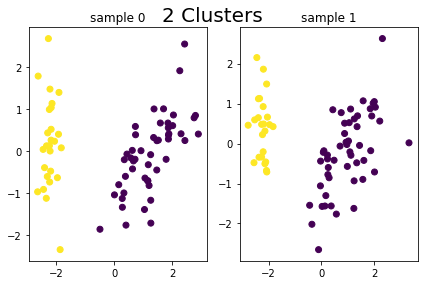

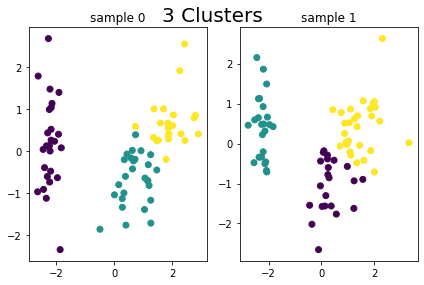

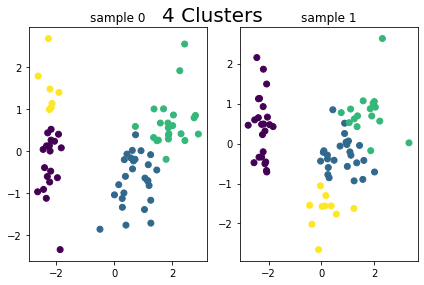

In [75]:
# For each  number of clusters, plot the clusters using the
# pca features for each sample.
for cluster in range(2, 5):
    
    # Make a grid of subplots.
    f, axarr = plt.subplots(1, 2)
    
    # Make a plot for each sample.
    for i in range(2):
        
        # PCA-created features.
        x_sub = ypred['pca_f1_sample{}'.format(i)]
        y_sub = ypred['pca_f2_sample{}'.format(i)]
        
        # Cluster assignments.
        c = ypred['clust{}_sample{}'.format(cluster, i)]
        
        # Assign the subplot to its place on the grid.
        axarr[i].scatter(x_sub, y_sub, c=c)
        axarr[i].set_title('sample {}'.format(i))
    
    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()
    print('\n')

In [76]:
labels = KMeans(n_clusters=2, random_state=123).fit_predict(X_std)
print(metrics.silhouette_score(X_std, labels, metric='euclidean'))

0.5817500491982808


This happens because at first glance it actually appears that there are likely only two clusters (without knowing K) using KMeans, this mostly can be explained because of the two clusters very close to one another that can't be linearly split from one another, meaning those two clusters actually take away from the silhouette score when looking at a k=3 number of clusters.

# #2

In [81]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
heart_disease = engine.execute('SELECT * FROM heartdisease').fetchall()
engine.dispose()

In [82]:
heartdisease_df = pd.DataFrame(heart_disease)
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]
X = X.replace(to_replace='?', value=0)
y = np.where(y > 0, 0, 1)

In [83]:
X_std = scaler.fit_transform(X)
X_pca = pca.fit_transform(X_std)

In [84]:
X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(X_std, X_pca, test_size=.5, random_state=12)

In [85]:
# Data frame to store features and predicted cluster memberships.
ypred = pd.DataFrame()

# Pass a list of tuples and a counter that increments each time we go
# through the loop. The tuples are the data to be used by k-means,
# and the PCA-derived features for graphing. We use k-means to fit a
# model to the data, then store the predicted values and the two-feature
# PCA solution in the data frame.
for counter, data in enumerate([
    (X_half1, X_pcahalf1),
    (X_half2, X_pcahalf2)]):
    
    # Put the features into ypred.
    ypred['pca_f1' + '_sample' + str(counter)] = pd.Series(data[1][:,0])
    ypred['pca_f2' + '_sample' + str(counter)] = pd.Series(data[1][:,1])
    
    # Generate cluster predictions and store them for clusters 2 to 4.
    for nclust in range(2, 5):
        pred = KMeans(n_clusters=nclust, random_state=123).fit_predict(data[counter])
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pd.Series(pred)

# #2.1

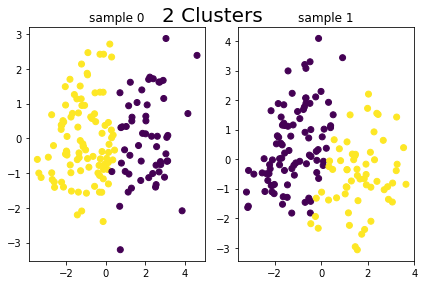

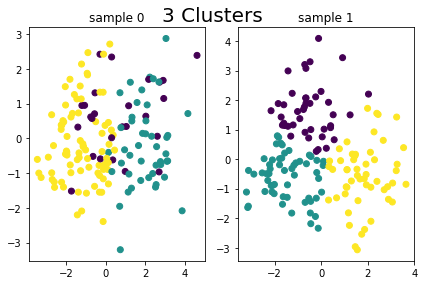

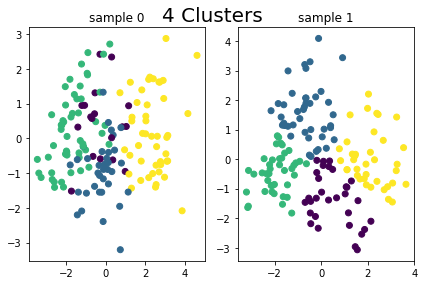

In [86]:
# For each  number of clusters, plot the clusters using the
# pca features for each sample.
for cluster in range(2, 5):
    
    # Make a grid of subplots.
    f, axarr = plt.subplots(1, 2)
    
    # Make a plot for each sample.
    for i in range(2):
        
        # PCA-created features.
        x_sub = ypred['pca_f1_sample{}'.format(i)]
        y_sub = ypred['pca_f2_sample{}'.format(i)]
        
        # Cluster assignments.
        c = ypred['clust{}_sample{}'.format(cluster, i)]
        
        # Assign the subplot to its place on the grid.
        axarr[i].scatter(x_sub, y_sub, c=c)
        axarr[i].set_title('sample {}'.format(i))
    
    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()
    print('\n')

The only thing that really makes sense here is the two cluster section.

# #2.2

In [90]:
for k in range(2,5):
    ypred = KMeans(n_clusters=k).fit_predict(X_std)
    ari = metrics.adjusted_rand_score(y, ypred)
    print('KMeans: K={}'.format(k))
    print('Score: {}'.format(ari))

KMeans: K=2
Score: 0.4380857727169879
KMeans: K=3
Score: 0.28079322488854486
KMeans: K=4
Score: 0.19450096869137104


As expected, more clusters, in this case, leads to a worse score (sense we know the correct number of clusters are 2).

# #2.3

In [92]:
for k in range(2,5):
    ypred = KMeans(n_clusters=k).fit_predict(X_std)
    sil = metrics.silhouette_score(X_std, ypred)
    print('KMeans: K={}'.format(k))
    print('Score: {}'.format(sil))

KMeans: K=2
Score: 0.17530682286260937
KMeans: K=3
Score: 0.12965559751442526
KMeans: K=4
Score: 0.13289748700630488


None of these are especially good, but it does show that when K=2, there is a higher silhouette score.